#Making the Image Recognition Model 

To improve accuracy for `unknown` or `silence` clips, I decided to remove all the other targets that were not tested on test set for maximum optimization.  

Through this, my model would get to learn the target variables better, thereby improving its accuracy. Since, simoid outputs only the likeliness of a particular object without having the grand sum of the predictions to 1, I will increase the chances of figuring out a the outliers or background noise. 

The dataset created for Spectogram, Mel Spectogram and MFCC will be utilized in training our classifier here. 

The notebook is divided into five segments:
1.  Getting Started
1.   Spectogram
2.   Mel-Spectogram
3.   MFCC Spectogram
4.   Putting it all together



#Getting Started

In this section of the notebook, I will be discussing the various libraries required, getting the all the files from the training dataset and the common functionalities developed for the later models. 



##Downloading Libraries Required

In [1]:
!pip install -Uqq fastbook 
import fastbook 
fastbook.setup_book() 

     |████████████████████████████████| 727kB 6.0MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 194kB 58.3MB/s 
     |████████████████████████████████| 1.2MB 61.7MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 49.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


##Importing Libraries

In [1]:
from fastbook import *
from fastai.vision.all import *
from google.colab import drive
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import files
import pandas as pd
import os
import gc
from fastai.vision import models

We collect all the garbage values.

#Get Data 


Since the dataset is in the google drive, we will unzip it to our temporary drive in colab. 

##Train Dataset
We load the train sets for Spectogram, Mel Spectogram, and MFCC Spectogram here. 

In [66]:
%%bash 
unzip /content/gdrive/MyDrive/SpeechRecognition/spectogram.zip
unzip /content/gdrive/MyDrive/SpeechRecognition/mfcc.zip
unzip /content/gdrive/MyDrive/SpeechRecognition/mel_spectogram.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Load the Test Sets

We load the test sets for Spectogram, Mel Spectogram, and MFCC Spectogram here. 

In [83]:
%%bash
# unzip /content/gdrive/MyDrive/SpeechRecognition/test_spec.zip
# unzip /content/gdrive/MyDrive/SpeechRecognition/test_mfcc.zip
unzip /content/gdrive/MyDrive/SpeechRecognition/test_mel.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Paths 

In [141]:
path_spec = Path('/content/spec/train_images')
path_mel = Path('/content/mel_spec/train_images')
path_mfcc = Path('/content/mfcc/train_images')

#Restart CUDA
Run this cell, if CUDA memory runs out. 

In [142]:
gc.collect()
torch.cuda.empty_cache()

#Check out Dataset!

Since, the name for all the test and train files are the same, we can create a common list for all examples, train set, validation set, and test set. 

The function below, `total_values`, is used to get all the relative paths of each file and the number of categories. 

`total_files`: The variable holds the relative path of each file i.e.  `parent_file_name/file_name.jpg` 
`cats`: The variable holds the different catergorical names. 

In [5]:
def total_values(train_audio):
  sum, cats = 0, os.listdir(train_audio)
  print(f'Total number of categories is {len(cats)-1}')

  audio = []

  for cat in cats:
    if cat != '_background_noise_':
      pth = os.path.join(train_audio, cat)
      files = [os.path.join(cat, f) for f in os.listdir(pth)]
      audio.append(files)
      numbs = len(files)
      print(cat, numbs)
      sum += numbs

  print(f'Total number of examples are {sum}')

  return cats, [j for cat in audio for j in cat]
cats, total_files = total_values(path_mel)

Total number of categories is 30
one 2370
three 2356
stop 2380
seven 2377
marvin 1746
four 2372
wow 1745
house 1750
five 2357
right 2367
bird 1731
tree 1733
down 2359
off 2357
cat 1733
happy 1742
eight 2352
go 2372
on 2367
nine 2364
six 2369
sheila 1734
zero 2376
bed 1713
left 2353
yes 2377
up 2375
dog 1746
no 2375
two 2373
Total number of examples are 64721


Since, there are 64,721 training examples, we use the assert function to check if we have all the file names in our variable `total_files`.

In [6]:
assert 64721==len(total_files) 

#Split the Dataset

##Upload Test and Validation List

In [ ]:
files.upload()

Saving testing_list.txt to testing_list.txt
Saving validation_list.txt to validation_list.txt


{'testing_list.txt': b'bed/0c40e715_nohash_0.wav\nbed/0ea0e2f4_nohash_0.wav\nbed/0ea0e2f4_nohash_1.wav\nbed/105a0eea_nohash_0.wav\nbed/1528225c_nohash_0.wav\nbed/1528225c_nohash_1.wav\nbed/1528225c_nohash_2.wav\nbed/1528225c_nohash_3.wav\nbed/1b4c9b89_nohash_0.wav\nbed/1cb788bc_nohash_0.wav\nbed/1cb788bc_nohash_1.wav\nbed/20d3f11f_nohash_0.wav\nbed/210f3aa9_nohash_0.wav\nbed/2796ac50_nohash_0.wav\nbed/283d7a53_nohash_0.wav\nbed/28497c5b_nohash_0.wav\nbed/2c6d3924_nohash_0.wav\nbed/2d82a556_nohash_0.wav\nbed/2d82a556_nohash_1.wav\nbed/370844f7_nohash_0.wav\nbed/37dca74f_nohash_0.wav\nbed/3df9a3d4_nohash_0.wav\nbed/3df9a3d4_nohash_1.wav\nbed/3f170018_nohash_0.wav\nbed/3f2b358d_nohash_0.wav\nbed/3ff840aa_nohash_0.wav\nbed/3ff840aa_nohash_1.wav\nbed/422d3197_nohash_0.wav\nbed/4290ca61_nohash_0.wav\nbed/43fc47a7_nohash_0.wav\nbed/44260689_nohash_0.wav\nbed/4620dc14_nohash_0.wav\nbed/47d01978_nohash_0.wav\nbed/4845bb10_nohash_0.wav\nbed/4c4d2526_nohash_0.wav\nbed/4c7c95de_nohash_0.wav\nbed/4

##Create Validation Set
Using the `validation_list.txt` provided by Kaggle, I form a list called `val` containing the relative paths of each file belonging to the validation set. 

In [7]:
df = pd.read_csv('/content/validation_list.txt', header = None)
df[0] = df[0].apply(lambda x: f'{x[:-3]}jpg') 
val_main = df[0].values 

##Create Test Set
Using the `testing_list.txt` provided by Kaggle, I form a list called `test` containing the relative paths of each file belonging to the validation set. 

`true_test` is used to contain the string labels of all the test files. 

In [8]:
df = pd.read_csv('/content/testing_list.txt', header = None)
df[0] = df[0].apply(lambda x: x[:-3]+'jpg') 
test_main = df[0].values 


##Create Train Set
I determine the the `train` list by iterating through `total_files` and inputting files that are not in the concatenated list of test and validation lists. 

In [9]:
train_main = [x for x in total_files if x not in [*val_main,*test_main]] 

But, now we will reduce the of the total files to contain only the test labels. Then, post the changes, we will adjust the train, test and validation sets accordingly. 

##Create the Final Train, Test and Validation Set

This set will be specific to our target variables in the test set. 

In [18]:
test_cats = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"] 

labels = [label_func(t)[0] for t in total_files]
df = pd.DataFrame(list(zip(total_files, labels)), columns = ['file','label'])

#focused the dataframe 
df_focused = df.loc[df.label.isin(test_cats)]
train = df_focused[df_focused.file.isin(train_main)]['file'].values
val = df_focused[df_focused.file.isin(val_main)]['file'].values
test = df_focused[df_focused.file.isin(test_main)]['file'].values

Get the test labels. 

In [19]:
true_test = df_focused[df_focused.file.isin(test_main)]['label'].values

The total files in this subset is saved in `files`. 

In [20]:
files = np.concatenate((train, val, test), axis=0)

In [21]:
print(f'The length of the train set is {len(train)}') 
print(f'The length of the validation set is {len(val)}')
print(f'The length of the test set is {len(test)}') 

The length of the train set is 18538
The length of the validation set is 2577
The length of the test set is 2567


#Some Common Functions

Before we begin with the training, I am listing below the common functionalities that are repeated for each model. 

###Get Image Files

Through this function, I will be getting the paths for both Train and Validation dataset. 

I have specifically left out the Test set to have an unseen data that can be run to check the real accuracy of the model. 

In [11]:
def get_image_files(path):
  return [Path(path/f) for f in [*train,*val]]

###Get the Label
The label for each audio file is the parent folder it is kept in. However, the issue is how to obtain the name of that folder. 

By `label_func`, I make the process easier for obtaining the label of each audio file using the regular expression `r'([^/]+)/'`



In [12]:
def label_func(fname):
  return re.findall(r'([^/]+)/', str(fname))[-1].split()

###Splitting the Dataset 
To test the accuracy of the model during training, I need a validation set. The model will only show the accuracy or error rate on this set. Furthermore, this reduces the chances of overfitting.  

By `split`, I will create two sets: train and validation set. The function returns `True` for all paths to the validation folder and `False` to the train set. 



In [13]:
def split(fpath):
  return  fpath in validation

###Threshold

Since, the test set in Kaggle has various audio clips that contain white noise or unknown sounds, I need to determine a confidence level in the model. 

This is done by creating the function `thresh` which  will only keep the predictions with confidence levels higher than `n`. 

`preds_max` holds the confidence level of the for each prediction. 

In [14]:
def thresh(n, pred):
  preds_thresh = []
  vals = [p > n for p in preds_max]
  for id, v in enumerate(vals):
    if v == True: 
      preds_thresh.append(pred[id])
    else: preds_thresh.append('silence')
  return preds_thresh

###Confusion Matrix

The `ConfusionMatrix` is a graphical representation of the function `confusion_matrix` by SKLearn on `pred` and `true` i.e. the predicted label and the actual label. 


In [81]:
def ConfusionMatrix(cats, pred, true):  
  matrix = confusion_matrix(pred, true)

  fig, ax = plt.subplots(figsize=(15, 15))
  ax= plt.subplot()
  sns.heatmap(matrix, annot=True, cmap='Blues',ax = ax, fmt='g');

  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(cats, Rotation = 45); 
  ax.yaxis.set_ticklabels(cats, Rotation = 0);

###Decode Predictions
Get the decoded predictions!

In [76]:
def get_cats(cats, pred): 
  return [cats[i] for i in pred]

###Get Accuracy 
Get the accuracy of the sets. 

In [52]:
def acc(df): return ((df.Pred.values == labels_test).mean())

###Get DataFrame

Get DataFrame for train and validation dataset. 

In [22]:
def predictions(learn):
  train_pred = learn.get_preds(0)
  val_pred = learn.get_preds(1)

  train_max, train_ind = torch.max(train_pred[0], dim = 1)
  val_max, val_ind = torch.max(val_pred[0], dim = 1)

  prob = [i.item() for i in [*train_max,*val_max]]
  ind = [i.item() for i in [*train_ind,*val_ind]]
  labels = labels_subset

  return pd.DataFrame(list(zip(prob,ind, labels)), columns = ['Prob','Pred','True'])

Get DataFrame for test dataset. 

In [53]:
def pred_test(learn, dl): 
  test = learn.get_preds(dl = dl)
  preds_max, preds = torch.max(test[0], dim = 1)
  return pd.DataFrame(list(zip(preds_max.tolist(), preds.tolist(), labels_test)),  columns = ['Prob','Pred','True'])

#Spectogram Model 

We will first create a classifier to classify spectogram images into words. 

##Create Image DataBunch 

Let's create the `validation` list which holds the absolute path to all the validation files. 

In [21]:
validation = [path_spec/x for x in val]

We create the Data Generator using FastAI's Data Block function. 

The function is broadly classified into 5 parts: 

1.   `blocks`: Specify the blocks AKA dependent and independent variable. In our case the dependent variable is the categories, and independent variable is the images. 
In order to call the Binary Cross Entropy function, I label the independent variable as MultiCategoryBlock. 
2.   `get_items`: Through this we get the file paths in the training and validation dataset.
3.    `get_y`: We call `label_func` to get the labels for our images. 
4.    `splitter`: We split the dataset into train and validation by passing our `split` function to FastAI's `FuncSplitter`
5.    `item_tfms`: We standardize the size of each image to 224. Usually 224 works great to get accurate predictions without being too computationally expensive. 


In [22]:
spec = DataBlock(blocks = (ImageBlock, MultiCategoryBlock), 
          get_items = get_image_files, 
          get_y = label_func, 
          splitter = FuncSplitter(split), 
          item_tfms=Resize(224))

We call the Data Generator `spec` to our desired path to get the train and validation dataloaders, `dls_spec`.

In [23]:
dls_spec = spec.dataloaders(path_spec)  

The cell below will prove useful for getting the categories and encoded true values of train, test and validation set. 

In [24]:
cats = list(dls_spec.vocab)
labels_subset = [cats.index(label_func(t)[0]) for t in [*train, *val]]
labels_test = [cats.index(t) for t in true_test]

In [25]:
cats

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

We use `dls_spec` to create our `test_spec` i.e our test dataloaders.

In [26]:
test_spec = dls_spec.test_dl([path_spec/t for t in test], with_labels=True) 

It should be noted that the learner takes dataloaders only, which is why our train, val and test set have been converted to the same. 

We then take a quick glance inside our `dls_spec` to check if everything is working correctly!

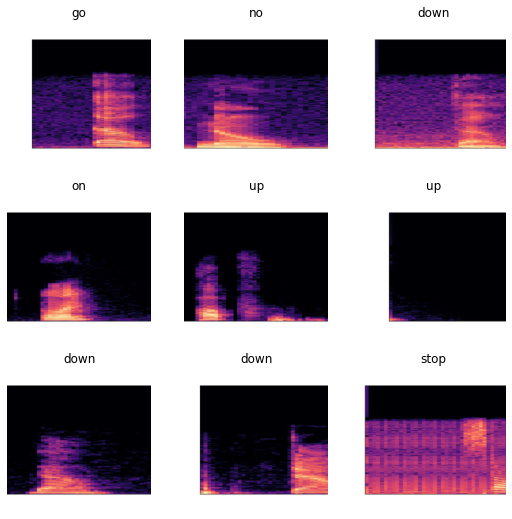

In [27]:
dls_spec.show_batch()

##Train the Dataset! 

We pass a pretrained DenseNet121 architecture on ImageNet and `dls_spec` to our `cnn_learner` with the metrics set up for `accuracy`. 

In [28]:
learn_spec = cnn_learner(dls_spec, models.densenet161, metrics= accuracy_multi).to_fp16()

By `lr_find()`, we can plot the most appropriate learning rate for our model. 

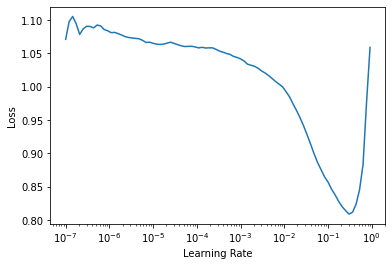

In [29]:
lr_min, lr_steep = learn_spec.lr_find() 

I replot the LR Finder plot to find the steepest slope for maximum optimization. 

In [30]:
print('The minimum learning rate is', lr_min)
print('The steepest learning rate is', lr_steep) 

The minimum learning rate is 0.03019951581954956
The steepest learning rate is 0.03981071710586548


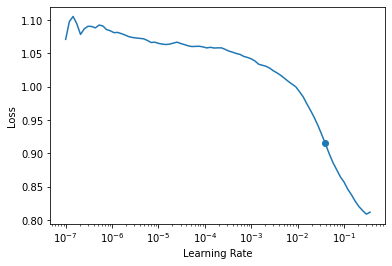

In [35]:
learn_spec.recorder.plot_lr_find(skip_end = 10)
plt.scatter(lr_steep, .915);

By calling `fine_tune`, I tune the existing DenseNet161 model. 

I intially tune the head of the model for 1 epoch. 

Post satisfaction with the accuracy, I unfreeze the model and train for 4 epochs untill maximum accuracy is achieved. 

In [36]:
learn_spec.fine_tune(4, base_lr = lr_steep, freeze_epochs=1) 

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.094328,0.073069,0.975941,02:07


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.057339,0.296300,0.966317,02:23
1,0.047573,0.056954,0.983081,02:22
2,0.029129,0.023054,0.991929,02:22
3,0.017650,0.020049,0.993093,02:22


Unlike the previous models we have explored in our other notebooks due to the restriction in scope and model change, our learner no longer underfits. 
The accuracy is 99.30% for the validation set. 

I then save the .pkl file of the learner. 

In [37]:
learn_spec.export('spec.pkl') 

I get the prediciton dataframe containing 

1.   FileName
2.   Probability
3.   Predicted Value
4.    True value

for both train and validation set. 



In [129]:
df_spec = predictions(learn_spec) 

##Make Predicitions

In [130]:
spec_inf = load_learner('/content/spec.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [131]:
spec_inf.model = spec_inf.model.cuda() #pushing model on GPU
spec_inf.dls.to('cuda'); #pushing dataset on GPU 

Get test predictions. 

In [132]:
df_spec_test = pred_test(spec_inf, test_spec)

Create train, test and validation predicted dataset. 

In [138]:
df_spec_all = pd.concat([df_spec, df_spec_test])
df_spec_all.index = files

In [140]:
df_spec_all.head()

,Prob,Pred,True
stop/8e05039f_nohash_2.jpg,0.999997,7,7
stop/888a0c49_nohash_2.jpg,1.000000,7,7
stop/418e7158_nohash_1.jpg,1.000000,7,7
stop/1eddce1d_nohash_0.jpg,0.554199,7,7
stop/652b3da7_nohash_0.jpg,0.999976,7,7


In [141]:
df_spec_all.to_csv('spec.csv')

##Make Inferences 

Decode the spectrogram predictions. 

In [142]:
spec_pred = get_cats(df_spec_test.Pred) 

The accuracy on the test subset is

In [143]:
acc(df_spec_test)

0.9645500584339696

The accuracy is 96.45% on the test set.
Build a confusion matrix for predicted and true values.  

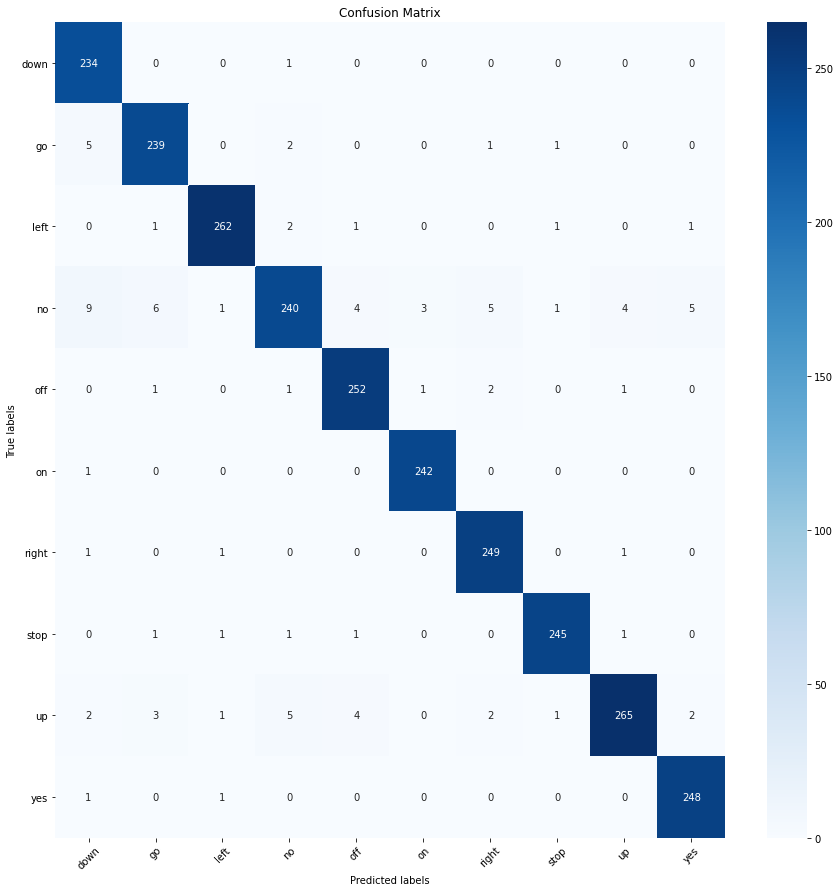

In [144]:
ConfusionMatrix(spec_pred, true_test) 

#Mel-Spectogram 


We will first create a classifier to classify mel spectogram images into the correct words. Several functions done in Spectrogram are repeated here

##Create Image DataBunch 
Using the common functions, I create the DataBunch to pass through the my learner. 

In [24]:
validation = [path_mel/x for x in val]

In [25]:
mel_spec = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
          get_items = get_image_files,
          get_y = label_func, 
          splitter = FuncSplitter(split), 
          item_tfms=Resize(224))  

In [32]:
dls_mel = mel_spec.dataloaders(path_mel, bs = 32) 

In [33]:
test_mel = dls_mel.test_dl([path_mel/t for t in test], with_labels=True) 

In [51]:
cats = list(dls_mel.vocab)
labels_subset = [cats.index(label_func(t)[0]) for t in [*train, *val]]
labels_test = [cats.index(t) for t in true_test]

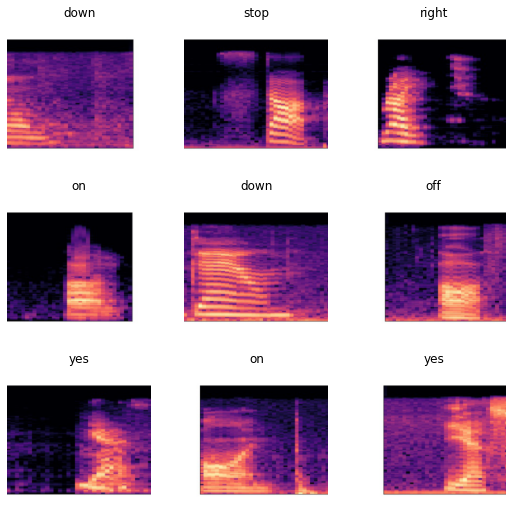

In [38]:
dls_mel.show_batch() 

##Train the Classifier!

In [60]:
learn_mel = cnn_learner(dls_mel, models.densenet121, metrics = accuracy_multi)  

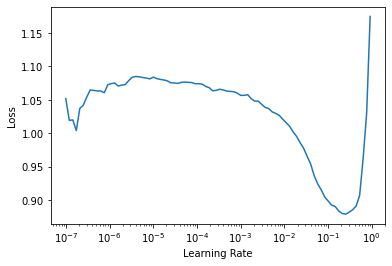

In [61]:
lr_min, lr_steep = learn_mel.lr_find() 

I replot the LR Finder plot to find the steepest slope for maximum optimization. 

In [62]:
print('The minimum learning rate is', lr_min)
print('The steepest learning rate is', lr_steep)

The minimum learning rate is 0.025118863582611083
The steepest learning rate is 0.03981071710586548


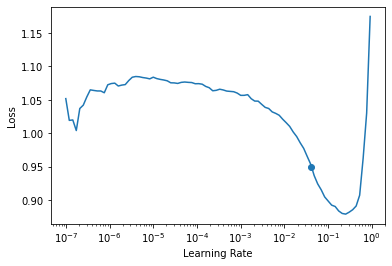

In [64]:
learn_mel.recorder.plot_lr_find()
plt.scatter(lr_steep,0.95);

We train our DenseNet121 model on the dataset, where the head is trained for 2 epochs and the entire model is trained for 5 epochs.

I could not train DenseNet169 due to limitations in memory.

In [65]:
learn_mel.fine_tune(5, base_lr = lr_steep, freeze_epochs = 2) 

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.105242,0.072295,0.974505,02:14
1,0.112360,0.071714,0.981684,02:14


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.069282,0.254654,0.974583,02:37
1,0.060177,0.053514,0.983935,02:37
2,0.039989,0.029098,0.991075,02:37
3,0.030585,0.019492,0.993714,02:37
4,0.019850,0.018710,0.994335,02:37


The model has an accuracy of 99.43% on validation dataset.

In [66]:
learn_mel.export('mel.pkl') 

Get train and validation predictions. 

In [67]:
df_mel_sub = predictions(learn_mel) 

##Make Predicitions on Mini Test Set!

In [68]:
mel_inf = load_learner('/content/mel.pkl') 

Putting the model and dataset on the GPU! 

In [69]:
mel_inf.model = mel_inf.model.cuda()
mel_inf.dls.to('cuda');

Now let's predict on test set. 

In [70]:
df_mel_test = pred_test(mel_inf, test_mel)

In [71]:
df_mel = pd.concat([df_mel_sub, df_mel_test])

In [72]:
df_mel.to_csv('mel.csv')

In [73]:
df_mel.head()

,Prob,Pred,True
0,0.999985,7,7
1,0.999983,7,7
2,0.999999,7,7
3,0.217227,8,7
4,0.999699,7,7


##Make Inferences 

In [78]:
pred_mel = get_cats(cats, df_mel_test.Pred.values)

In [79]:
acc(df_mel_test)

0.9672769770159719

The accuracy is 96.72% on the test set. 

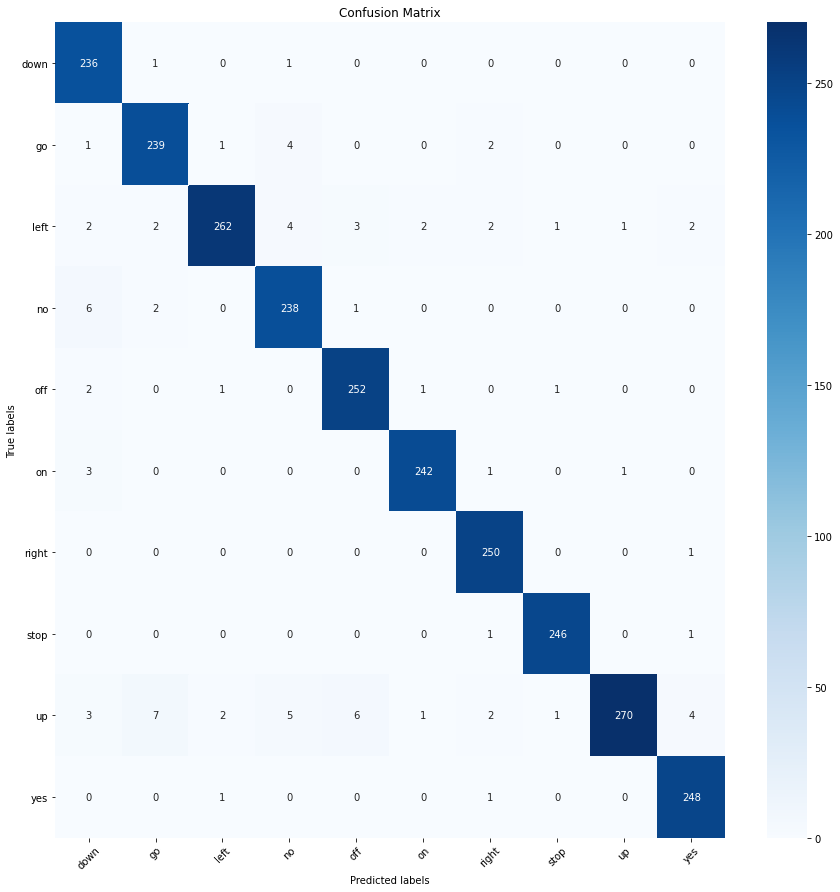

In [82]:
ConfusionMatrix(cats, pred_mel, true_test)

#MFCC Spectogram 


We will first create a classifier to classify MFCC spectogram images into the correct words. Several functions have been repeated from spectrogram, hence will not be explaining here. 

##Create Image DataBunch 

Using the above functions, I create the DataBunch to pass through the my learner. 

In [106]:
validation = [path_mfcc/x for x in val]

In [107]:
mfcc_spec = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
          get_items = get_image_files,
          get_y = label_func, 
          splitter = FuncSplitter(split),
          item_tfms=Resize(224)) 

In [143]:
dls_mfcc = mfcc_spec.dataloaders(path_mfcc) 

In [204]:
test_mfcc = dls_mfcc.test_dl([path_mfcc/t for t in test], with_labels=True)

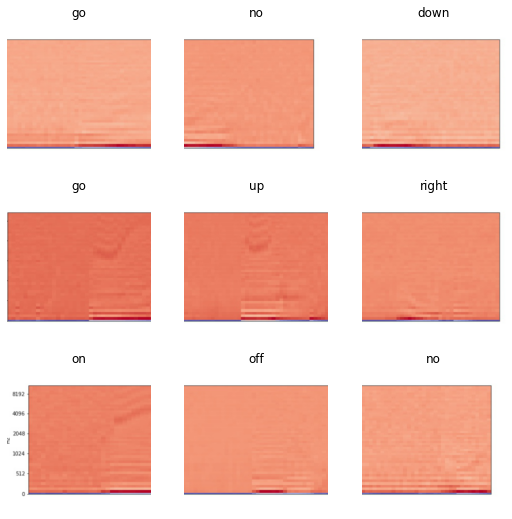

In [138]:
dls_mfcc.show_batch() 

##Train the Classifier!
We train our VGG16 model on the dataset, where the head is trained for 2 epochs and the entire model is trained for 5 epochs. 

In [196]:
learn_mfcc = cnn_learner(dls_mfcc, models.vgg16_bn, metrics= accuracy_multi)  

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [198]:
learn_mfcc.fine_tune(5, base_lr = 3e-2, freeze_epochs=2) 

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.212980,0.153663,0.940900,02:13
1,0.110180,0.086938,0.968607,02:12


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.065502,0.104691,0.966628,03:00
1,0.053445,0.072997,0.976213,03:00
2,0.043816,0.040110,0.985759,03:00


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.065502,0.104691,0.966628,03:00
1,0.053445,0.072997,0.976213,03:00
2,0.043816,0.040110,0.985759,03:00
3,0.026315,0.026106,0.991308,03:01
4,0.018205,0.023955,0.992084,03:01


The accuracy on the validation set is 99.2%

In [199]:
 learn_mfcc.export('mfcc.pkl') 

Get predictions on train and validation set. 

In [200]:
df_mfcc_sub = predictions(learn_mfcc) 

##Make Predicitions on Mini Test Set!
We will be using VGG16 to make the predictions on our Mini Test set. 

In [201]:
mfcc_inf = load_learner('/content/mfcc.pkl') 

Putting the model and dataset on the GPU! 

In [202]:
mfcc_inf.model = mfcc_inf.model.cuda()
mfcc_inf.dls.to('cuda'); 

Now let's predict!

In [205]:
df_mfcc_test = pred_test(learn_mfcc, test_mfcc) 

In [207]:
df_mfcc = pd.concat([df_mfcc_sub, df_mfcc_test])

In [208]:
df_mfcc.to_csv('mfcc.csv') 

In [209]:
df_mfcc.head()

,Prob,Pred,True
0,0.999995,7,7
1,0.999968,7,7
2,0.999907,7,7
3,0.411320,7,7
4,0.999956,7,7


##Make Inferences 

In [210]:
pred_mfcc = get_cats(cats,df_mfcc_test.Pred.values)

The test set has an accuracy of 96.37%

In [211]:
acc(df_mfcc_test)

0.9637709388391118

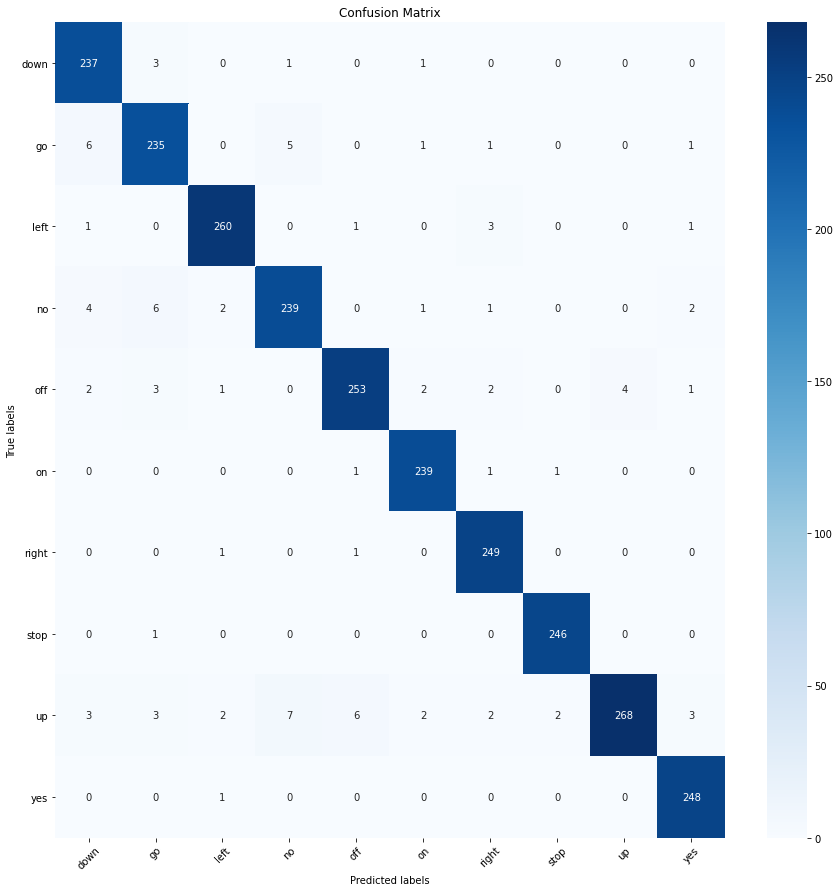

In [212]:
ConfusionMatrix(cats,pred_mfcc, true_test)

#Combine the DataFrames

#Test Set Predictions

Since, we are satified with the model created, let's get the predictions for all the test images!

##Some Common Functions!

###Threshold Predictions
Through `predict` we can retain the answers greater than the `0.5` i.e. the threshold.
However, for values below the threshold, we append `silence` to the list `preds`. 

In [84]:
def predict(prob, pred):
  preds = []
  for pr, p in zip(prob,pred):
    if pr>0.5: preds.append(cats[p])
    else: preds.append('silence')
  return preds

###Get files

Get all the test file names for any specific dataset dataset. 

In [85]:
def get_test_files(path):
  return os.listdir(path)

###Define Paths
Let's define the path to our dataset. 

In [166]:
path_spec_test = Path('/content/test_spec/')
path_mel_test = Path('/content/test_mel/') 
path_mfcc_test = Path('/content/mfcc_test/')

###Predict Test Set

In [87]:
def pred_kaggle(learn, dl): 
  test = learn.get_preds(dl = dl)
  preds_max, preds = torch.max(test[0], dim = 1)
  return pd.DataFrame(list(zip(test_audio, preds_max.tolist(), preds.tolist())),  columns = ['fname','Prob','Pred'])

##Spectogram Test Set

Get the test set file names from `get_test_files`

In [44]:
test_files = get_test_files(path_spec_test) 

Since, we know there are 158k+ files in the test set, we check to see if the test sets has same number of files.

In [45]:
assert 158538 == len(test_files) 

The below cell will define the test names for all the images. 

In [46]:
test_audio = [f'{t[:-3]}wav' for t in test_files] 

Create Kaggle test set dataloader!

In [48]:
spec_test_dls = dls_spec.test_dl([path_spec_test/t for t in test_files]) 

###Make Predicitions

In [49]:
spec_inf = load_learner('/content/spec.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [70]:
spec_inf.model = spec_inf.model.cuda() #pushing model on GPU 
spec_inf.dls.to('cuda'); #pushing dataset on GPU  

In [72]:
spec_test = pred_kaggle(spec_inf, spec_test_dls)

In [53]:
spec_test.head()

,fname,Prob,Pred
0,clip_743d18f19.wav,0.263383,4
1,clip_aab2971e3.wav,0.999999,7
2,clip_4b8b4a428.wav,0.142968,8
3,clip_465d3f8a6.wav,0.777838,2
4,clip_482f0a331.wav,0.774861,6


In [74]:
spec_test.to_csv('spec_test.csv')

###Make Inference

In [75]:
preds_cat = predict(spec_test.Prob,spec_test.Pred)
spec_sub = pd.DataFrame(list(zip(test_audio, preds_cat)), columns = ['fname', 'label']).set_index('fname')

In [76]:
spec_sub.to_csv('spec_sub.csv')

In [79]:
!rm -r test_spec
!rm -r spec

##Mel Spectogram Test Set

Get the test files and check if they are all present. 

In [90]:
test_files = get_test_files(path_mel_test) 

In [91]:
assert 158538 == len(test_files)

Since, we know there are 158k+ files in the test set, the test files for the spectogram is accurate.

In [92]:
test_mel = dls_mel.test_dl([path_mel_test/t for t in test_files]) 

In [93]:
test_audio = [f'{t[:-3]}wav' for t in test_files]

###Make Predicitions

In [94]:
mel_inf = load_learner('/content/mel.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [95]:
mel_inf.model = mel_inf.model.cuda() #pushing model on GPU 
mel_inf.dls.to('cuda'); #pushing dataset on GPU 

In [96]:
mel_test = pred_kaggle(mel_inf, test_mel) 

In [97]:
mel_test.to_csv('mel_test.csv') 

In [98]:
mel_test.head() 

,fname,Prob,Pred
0,clip_743d18f19.wav,0.195292,5
1,clip_aab2971e3.wav,0.999931,7
2,clip_4b8b4a428.wav,0.188502,4
3,clip_465d3f8a6.wav,0.879399,2
4,clip_482f0a331.wav,0.612227,5


###Make Inference

In [99]:
preds_cat = predict(mel_test.Prob,mel_test.Pred)
mel_sub = pd.DataFrame(list(zip(test_audio, preds_cat)), columns = ['fname', 'label']).set_index('fname')

In [101]:
mel_sub.to_csv('mel_sub.csv')

In [103]:
!rm -r mel_spec

##MFCC Test Set

Get path for the dataset

In [213]:
test_files = get_test_files(path_mfcc_test) 

In [214]:
assert 158538 == len(test_files) 

Since, we know there are 158k+ files in the test set, the test files for the spectogram is accurate.

In [215]:
test_mfcc = dls_mfcc.test_dl([path_mfcc_test/t for t in test_files])  

In [216]:
test_audio = [f'{t[:-3]}wav' for t in test_files] 

###Make Predicitions

In [217]:
mfcc_inf = load_learner('/content/mfcc.pkl')  

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [218]:
mfcc_inf.model = mfcc_inf.model.cuda() #pushing model on GPU 
mfcc_inf.dls.to('cuda'); #pushing dataset on GPU 

In [219]:
mfcc_test =  pred_kaggle(mfcc_inf, test_mfcc)

In [220]:
mfcc_test.to_csv('mfcc_test.csv')

In [221]:
mfcc_test.head()

,fname,Prob,Pred
0,clip_743d18f19.wav,0.522832,6
1,clip_aab2971e3.wav,0.999358,7
2,clip_4b8b4a428.wav,0.115087,8
3,clip_465d3f8a6.wav,0.457005,6
4,clip_482f0a331.wav,0.608986,5


###Make Inference

In [222]:
preds_cat = predict(mfcc_test.Prob,mfcc_test.Pred)
mfcc_sub = pd.DataFrame(list(zip(test_audio, preds_cat)), columns = ['fname', 'label']).set_index('fname')

In [223]:
mfcc_sub.to_csv('mfcc_sub.csv')

In [225]:
google.colab.files.download('mfcc_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !rm -r test_mfcc_spec
# !rm -r mfcc_train 

#Combine Predictions

In [252]:
mfcc_test = pd.read_csv('/content/mfcc_test.csv', index_col = 1).drop(['Unnamed: 0'],axis = 1)
mel_test = pd.read_csv('/content/mel_test.csv',index_col = 1).drop(['Unnamed: 0'],axis = 1)
spec_test = pd.read_csv('/content/spec_test.csv',index_col = 1).drop(['Unnamed: 0'],axis = 1)

df = pd.concat([mfcc_test,mel_test,spec_test],axis = 1)
df.columns = ['Prob_mfcc','Pred_mfcc','Prob_mel','Pred_mel','Prob_spec','Pred_spec']

In [253]:
df.head()

,Prob_mfcc,Pred_mfcc,Prob_mel,Pred_mel,Prob_spec,Pred_spec
fname,,,,,,
clip_743d18f19.wav,0.522832,6,0.195292,5,0.263383,4
clip_aab2971e3.wav,0.999358,7,0.999931,7,0.999999,7
clip_4b8b4a428.wav,0.115087,8,0.188502,4,0.142968,8
clip_465d3f8a6.wav,0.457005,6,0.879399,2,0.777838,2
clip_482f0a331.wav,0.608986,5,0.612227,5,0.774861,6


In this function we keep the predictions of the outputs which have a confidence interval greater than 0.5, rest all are marked `silence`.

In [263]:
predictions = []
for row in df.itertuples():
  preds = np.array([row.Pred_mfcc, row.Pred_mel, row.Pred_spec])
  thresh = np.array([row.Prob_mfcc, row.Prob_mel, row.Prob_spec])
  thresh_idx = np.argmax(thresh)

  if thresh[thresh_idx] > 0.5: 
    predictions.append(cats[preds[thresh_idx]])
  else: predictions.append('silence')

In [264]:
df_filter = pd.DataFrame(list(zip(test_audio, predictions)), columns = ['fname', 'label']).set_index('fname')

In [265]:
df_filter.to_csv('pred_filter50.csv')

In [266]:
google.colab.files.download('pred_filter50.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>